In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# Model
from sklearn.linear_model import LinearRegression
# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from math import sqrt

In [2]:
data_df = pd.read_csv('./train.csv')
data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
print("Data null ", data_df.isna())
print("Jmlah data null ", data_df.isna().sum())

Data null           Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False 

In [7]:
data_df.isnull().sum().sum()

6965

In [9]:
data_df = data_df.fillna(data_df.mean())

C:\Users\Hammam\AppData\Local\Temp\ipykernel_9712\2959339113.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_df = data_df.fillna(data_df.mean())


In [13]:
data_df['Street']

0       Pave
1       Pave
2       Pave
3       Pave
4       Pave
        ... 
1455    Pave
1456    Pave
1457    Pave
1458    Pave
1459    Pave
Name: Street, Length: 1460, dtype: object

In [29]:
data_objct = data_df.select_dtypes('object')
data_num = data_df.select_dtypes(include=['int64', 'float64'])

print(data_objct.sum())
print(data_num.sum())

MSZoning         RLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRMRLRLRLRLRLRMRL...
Street           PavePavePavePavePavePavePavePavePavePavePavePa...
LotShape         RegRegIR1IR1IR1IR1RegIR1RegRegRegIR1IR2IR1IR1R...
LandContour      LvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlL...
Utilities        AllPubAllPubAllPubAllPubAllPubAllPubAllPubAllP...
LotConfig        InsideFR2InsideCornerFR2InsideInsideCornerInsi...
LandSlope        GtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlG...
Neighborhood     CollgCrVeenkerCollgCrCrawforNoRidgeMitchelSome...
Condition1       NormFeedrNormNormNormNormNormPosNArteryArteryN...
Condition2       NormNormNormNormNormNormNormNormNormArteryNorm...
BldgType         1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fam...
HouseStyle       2Story1Story2Story2Story2Story1.5Fin1Story2Sto...
RoofStyle        GableGableGableGableGableGableGableGableGableG...
RoofMatl         CompShgCompShgCompShgCompShgCompShgCompShgComp...
Exterior1st      VinylSdMetalSdVinylSdWd SdngVinylSdVinylSdVin

C:\Users\Hammam\AppData\Local\Temp\ipykernel_9712\2492164691.py:4: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data_objct.sum())


In [30]:
data_num.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [31]:
dataset = data_num.drop('Id', axis=1)
dataset.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [32]:
plt.style.use('seaborn')

C:\Users\Hammam\AppData\Local\Temp\ipykernel_9712\240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [33]:
print(dataset.columns.tolist())

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [35]:
from sklearn.model_selection import train_test_split

X = dataset[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',]]
y = dataset['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_test_pred = model.predict(X_test)

print(f"MAE : {mean_absolute_error(y_test, y_test_pred)}")
print(f"MSE : {mean_squared_error(y_test, y_test_pred)}")
print(f"RMSE : {sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"R^2 : {r2_score(y_test, y_test_pred)}")

MAE : 23313.617731756127
MSE : 1281527917.257682
RMSE : 35798.434564344876
R^2 : 0.8163498569722316


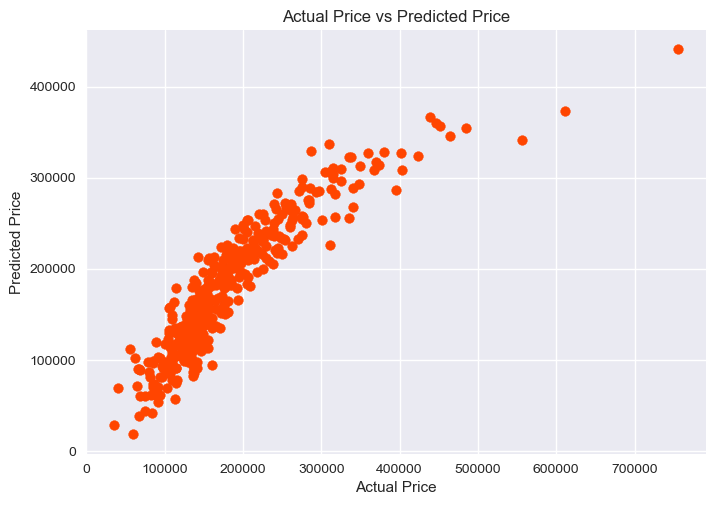

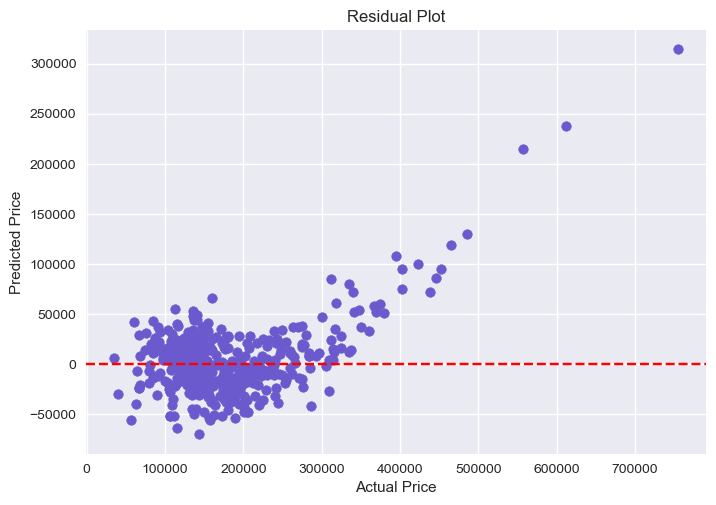

In [45]:
plt.scatter(y_test, y_test_pred, color = 'orangered')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

residuals = y_test - y_test_pred
plt.scatter(y_test, residuals, color = 'slateblue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Residual Plot")
plt.show()